In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [11]:

BASE_PATH = "/Users/ayush/Library/Mobile Documents/com~apple~CloudDocs/Developer/UIDAI/Cleaned_Data"

merged  = pd.read_csv(f"{BASE_PATH}/merged.csv")

In [12]:
merged

,state,district,year,month,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,total_enrolments,total_updates,adult_system_stress,child_system_stress,digital_friction_index,log_digital_friction,friction_outlier
0,Andaman and Nicobar Islands,nicobar,2025,9,42,6,0,2.0,116.0,92.0,148.0,48,358.0,264.0,94.0,264.000000,5.579730,False
1,Andaman and Nicobar Islands,nicobar,2025,10,6,4,0,6.0,39.0,29.0,55.0,10,129.0,94.0,35.0,94.000000,4.553877,False
2,Andaman and Nicobar Islands,nicobar,2025,11,11,0,0,4.0,82.0,116.0,54.0,11,256.0,136.0,120.0,136.000000,4.919981,False
3,Andaman and Nicobar Islands,nicobar,2025,12,5,1,0,6.0,52.0,203.0,51.0,6,312.0,103.0,209.0,103.000000,4.644391,False
4,Andaman and Nicobar Islands,north and middle andaman,2025,9,38,2,0,8.0,167.0,531.0,175.0,40,881.0,342.0,539.0,342.000000,5.837730,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,West Bengal,uttar dinajpur,2025,12,1913,619,66,1217.0,15427.0,3316.0,5535.0,2598,25495.0,20962.0,4533.0,312.865672,5.748965,False
4394,West Bengal,west midnapore,2025,9,243,26,0,81.0,1469.0,436.0,627.0,269,2613.0,2096.0,517.0,2096.000000,7.648263,False
4395,West Bengal,west midnapore,2025,10,92,13,0,33.0,1064.0,280.0,505.0,105,1882.0,1569.0,313.0,1569.000000,7.358831,False
4396,West Bengal,west midnapore,2025,11,90,6,0,61.0,1594.0,366.0,754.0,96,2775.0,2348.0,427.0,2348.000000,7.761745,False


# TRIVARIATE ANALYSIS

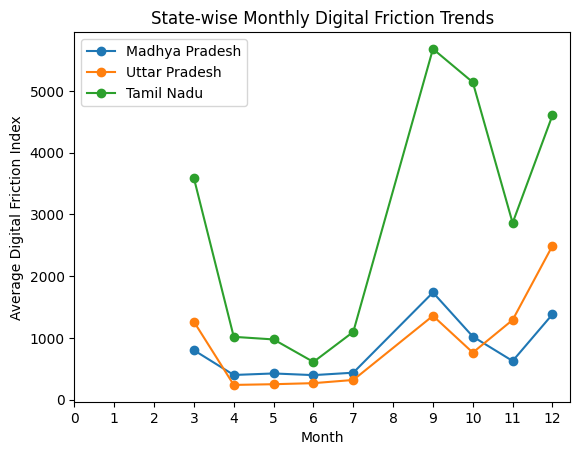

In [16]:
# State vs Time vs Digital Friction

state_month_friction = (
    merged
    .groupby(['state', 'month'])['digital_friction_index']
    .mean()
    .reset_index()
)

states_to_plot = ['Madhya Pradesh', 'Uttar Pradesh', 'Tamil Nadu']  # choose any

plt.figure()
for s in states_to_plot:
    temp = state_month_friction[state_month_friction['state'] == s]
    plt.plot(
        temp['month'],
        temp['digital_friction_index'],
        marker='o',
        label=s
    )

plt.xlabel("Month")
plt.ylabel("Average Digital Friction Index")
plt.title("State-wise Monthly Digital Friction Trends")
plt.xticks(range(0,13))
plt.legend()
plt.show()


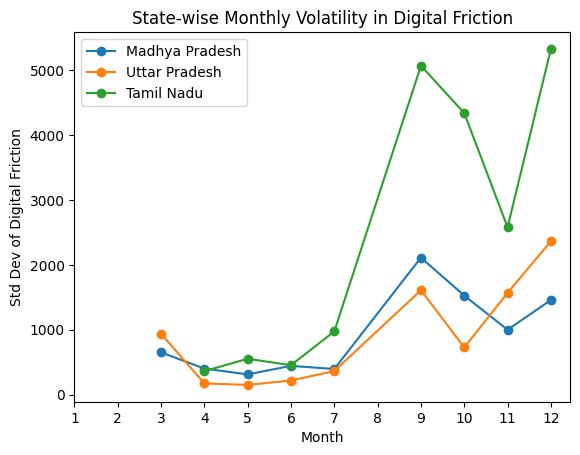

In [17]:
# State × Month × Friction Volatility

state_month_std = (
    merged
    .groupby(['state','month'])['digital_friction_index']
    .std()
    .reset_index()
)

plt.figure()
for s in states_to_plot:
    temp = state_month_std[state_month_std['state'] == s]
    plt.plot(
        temp['month'],
        temp['digital_friction_index'],
        marker='o',
        label=s
    )

plt.xlabel("Month")
plt.ylabel("Std Dev of Digital Friction")
plt.title("State-wise Monthly Volatility in Digital Friction")
plt.xticks(range(1,13))
plt.legend()
plt.show()


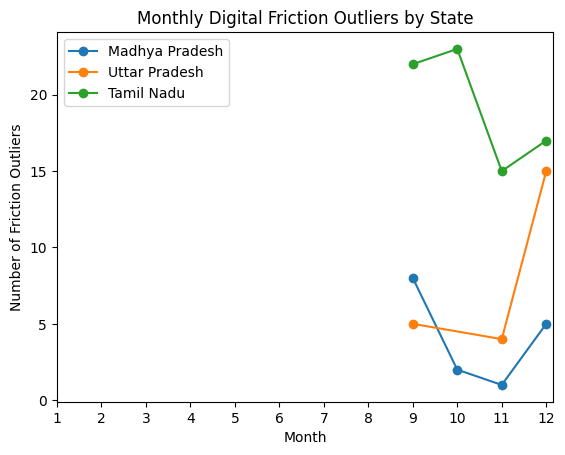

In [18]:
# State × Month × Friction Outliers

state_month_outliers = (
    merged[merged['friction_outlier']]
    .groupby(['state','month'])
    .size()
    .reset_index(name='outlier_count')
)

plt.figure()
for s in states_to_plot:
    temp = state_month_outliers[state_month_outliers['state'] == s]
    plt.plot(
        temp['month'],
        temp['outlier_count'],
        marker='o',
        label=s
    )

plt.xlabel("Month")
plt.ylabel("Number of Friction Outliers")
plt.title("Monthly Digital Friction Outliers by State")
plt.xticks(range(1,13))
plt.legend()
plt.show()


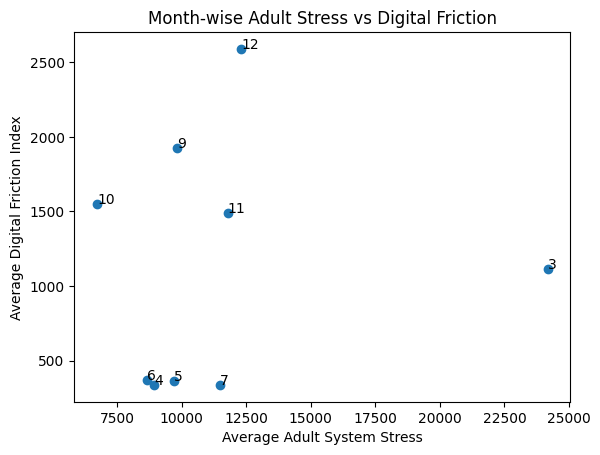

In [19]:
# Month × Adult Stress × Digital Friction

month_adult_friction = (
    merged
    .groupby('month')[['adult_system_stress','digital_friction_index']]
    .mean()
)

plt.figure()
plt.scatter(
    month_adult_friction['adult_system_stress'],
    month_adult_friction['digital_friction_index']
)

for m in month_adult_friction.index:
    plt.text(
        month_adult_friction.loc[m,'adult_system_stress'],
        month_adult_friction.loc[m,'digital_friction_index'],
        str(m)
    )

plt.xlabel("Average Adult System Stress")
plt.ylabel("Average Digital Friction Index")
plt.title("Month-wise Adult Stress vs Digital Friction")
plt.show()


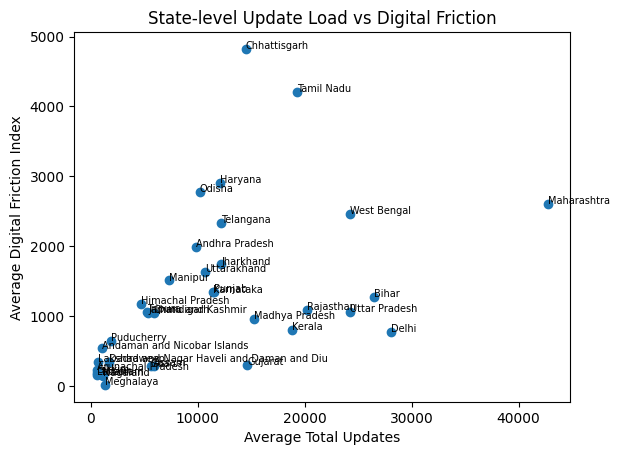

In [20]:
# State × Update Load × Digital Friction

state_load = (
    merged.groupby('state')[['total_updates','digital_friction_index']]
    .mean()
    .reset_index()
)

plt.figure()
plt.scatter(
    state_load['total_updates'],
    state_load['digital_friction_index']
)

for _, row in state_load.iterrows():
    plt.text(
        row['total_updates'],
        row['digital_friction_index'],
        row['state'],
        fontsize=7
    )

plt.xlabel("Average Total Updates")
plt.ylabel("Average Digital Friction Index")
plt.title("State-level Update Load vs Digital Friction")
plt.show()


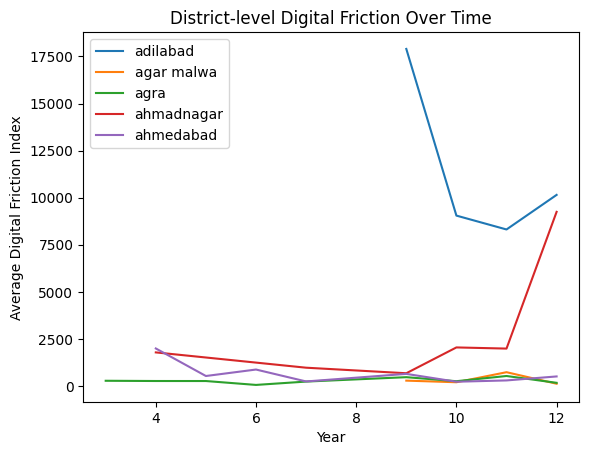

In [22]:
# District × Time × Digital Friction

district_time_friction = (
    merged.groupby(['district','month'])['digital_friction_index']
    .mean()
    .reset_index()
)

sample_districts = district_time_friction['district'].unique()[:5]

plt.figure()
for d in sample_districts:
    temp = district_time_friction[district_time_friction['district'] == d]
    plt.plot(temp['month'], temp['digital_friction_index'], label=d)

plt.xlabel("Year")
plt.ylabel("Average Digital Friction Index")
plt.title("District-level Digital Friction Over Time")
plt.legend()
plt.show()


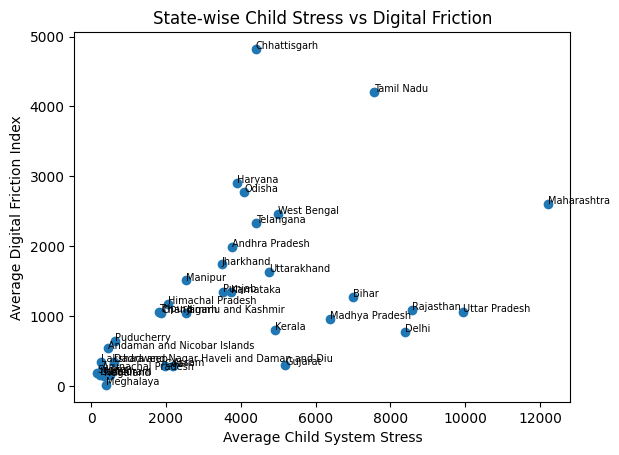

In [25]:
# State × Child Stress × Digital Friction

state_child = (
    merged.groupby('state')[['child_system_stress','digital_friction_index']]
    .mean()
    .reset_index()
)

plt.figure()
plt.scatter(
    state_child['child_system_stress'],
    state_child['digital_friction_index']
)

for _, row in state_child.iterrows():
    plt.text(
        row['child_system_stress'],
        row['digital_friction_index'],
        row['state'],
        fontsize=7
    )

plt.xlabel("Average Child System Stress")
plt.ylabel("Average Digital Friction Index")
plt.title("State-wise Child Stress vs Digital Friction")
plt.show()



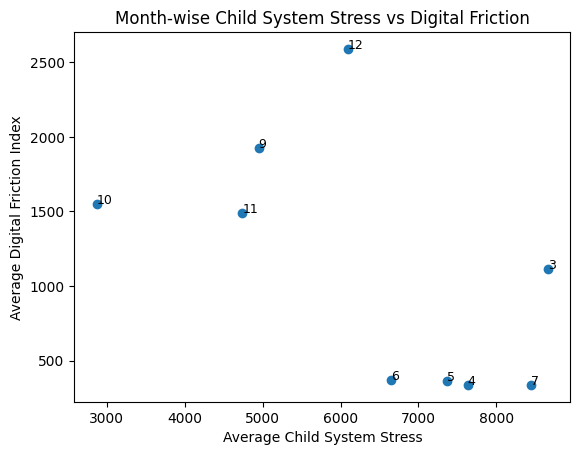

In [24]:
# Month × Child System Stress × Digital Friction

month_child_friction = (
    merged
    .groupby('month')[['child_system_stress', 'digital_friction_index']]
    .mean()
)

plt.figure()
plt.scatter(
    month_child_friction['child_system_stress'],
    month_child_friction['digital_friction_index']
)

for m in month_child_friction.index:
    plt.text(
        month_child_friction.loc[m, 'child_system_stress'],
        month_child_friction.loc[m, 'digital_friction_index'],
        str(m),
        fontsize=9
    )

plt.xlabel("Average Child System Stress")
plt.ylabel("Average Digital Friction Index")
plt.title("Month-wise Child System Stress vs Digital Friction")
plt.show()


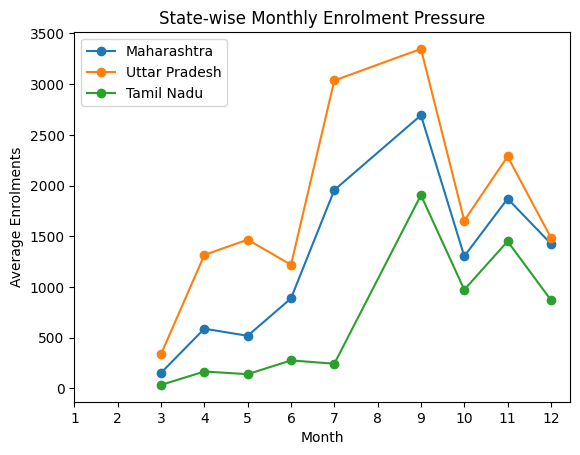

In [26]:
# State × Month × Enrolment Pressure

state_month_enrol = (
    merged
    .groupby(['state','month'])['total_enrolments']
    .mean()
    .reset_index()
)

states_to_plot = ['Maharashtra', 'Uttar Pradesh', 'Tamil Nadu']

plt.figure()
for s in states_to_plot:
    temp = state_month_enrol[state_month_enrol['state'] == s]
    plt.plot(temp['month'], temp['total_enrolments'], marker='o', label=s)

plt.xlabel("Month")
plt.ylabel("Average Enrolments")
plt.title("State-wise Monthly Enrolment Pressure")
plt.xticks(range(1,13))
plt.legend()
plt.show()


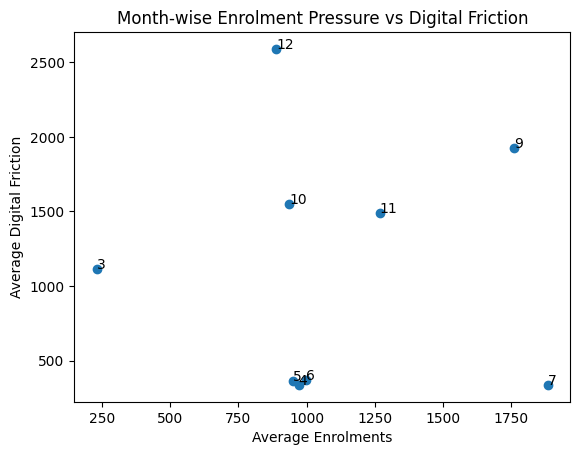

In [27]:
# Month × Enrolment Pressure × Digital Friction

month_enrol_friction = (
    merged
    .groupby('month')[['total_enrolments','digital_friction_index']]
    .mean()
)

plt.figure()
plt.scatter(
    month_enrol_friction['total_enrolments'],
    month_enrol_friction['digital_friction_index']
)

for m in month_enrol_friction.index:
    plt.text(
        month_enrol_friction.loc[m,'total_enrolments'],
        month_enrol_friction.loc[m,'digital_friction_index'],
        str(m)
    )

plt.xlabel("Average Enrolments")
plt.ylabel("Average Digital Friction")
plt.title("Month-wise Enrolment Pressure vs Digital Friction")
plt.show()


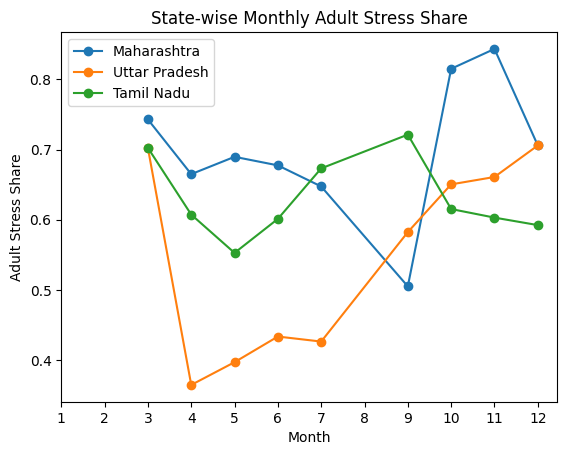

In [28]:
# State × Month × Adult Stress Share

merged['adult_stress_share'] = (
    merged['adult_system_stress'] /
    (merged['total_updates'] + 1)
)

state_month_adult_share = (
    merged
    .groupby(['state','month'])['adult_stress_share']
    .mean()
    .reset_index()
)

plt.figure()
for s in states_to_plot:
    temp = state_month_adult_share[state_month_adult_share['state'] == s]
    plt.plot(temp['month'], temp['adult_stress_share'], marker='o', label=s)

plt.xlabel("Month")
plt.ylabel("Adult Stress Share")
plt.title("State-wise Monthly Adult Stress Share")
plt.xticks(range(1,13))
plt.legend()
plt.show()


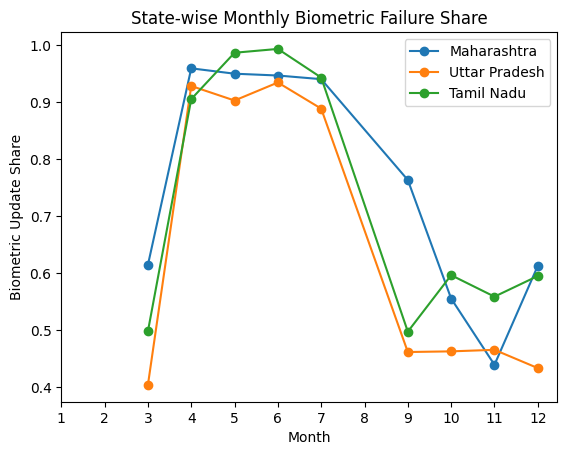

In [29]:
# State × Month × Update Mix (Biometric vs Demographic)

merged['bio_share'] = (
    (merged['bio_age_5_17'] + merged['bio_age_17_']) /
    (merged['total_updates'] + 1)
)

state_month_bio_share = (
    merged
    .groupby(['state','month'])['bio_share']
    .mean()
    .reset_index()
)

plt.figure()
for s in states_to_plot:
    temp = state_month_bio_share[state_month_bio_share['state'] == s]
    plt.plot(temp['month'], temp['bio_share'], marker='o', label=s)

plt.xlabel("Month")
plt.ylabel("Biometric Update Share")
plt.title("State-wise Monthly Biometric Failure Share")
plt.xticks(range(1,13))
plt.legend()
plt.show()


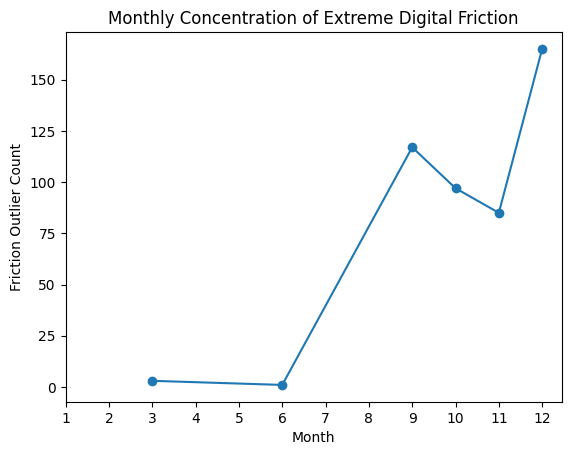

In [30]:
# Month × Friction × Outlier Density

month_outliers = (
    merged[merged['friction_outlier']]
    .groupby('month')
    .size()
    .reset_index(name='outlier_count')
)

plt.figure()
plt.plot(
    month_outliers['month'],
    month_outliers['outlier_count'],
    marker='o'
)

plt.xlabel("Month")
plt.ylabel("Friction Outlier Count")
plt.title("Monthly Concentration of Extreme Digital Friction")
plt.xticks(range(1,13))
plt.show()
